In [1]:
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm, tnrange
import matplotlib.pyplot as plt
import time
import seaborn as sns
tqdm.pandas()

In [2]:
#读取目录下所有数据文件的名字（不带文件格式后缀）  
#Read the names of all data files in the directory (without the file format suffix)
def get_pkl_file_name(dir_path):
    file_list = []
    for file in os.listdir(dir_path):
        if file.endswith("pkl"):
            file_list.append(file[:-4])
    print('pkl文件的数量为:{}'.format(len(file_list)))
    return sorted(file_list)

# 非GPS数据的缺失值处理 Missing value processing for non-GPS data
非GPS数据指的是三个运动传感器的数据(加速度计、陀螺仪、磁力计)   
Non-GPS datas refer to datas from the three motion sensors (accelerometer, gyroscope, magnetometer)

## 训练集数据处理
### 查看缺失情况

In [3]:
file_dir="../SHL2023/data_pkl"
names=get_pkl_file_name(file_dir)

pkl文件的数量为:28


In [ ]:
for name in tqdm(names):
    print('------------------Loading {} ------------------'.format(name + '.pkl'))
    df = pd.read_pickle(file_dir + '/' + name + '.pkl')
    print(df.isnull().sum())

bag、hand、hips的三个运动传感器数据均出现缺失（torso的数据没有出现缺失值），但缺失值最多不超过200个，而且大多为集中分布，故对这些缺失值做<span class="mark">线性插补</span>

### 处理缺失值

In [32]:
missing_list=['bag_acc_full.pkl','bag_gyr_full.pkl','bag_mag_full.pkl',
              'hand_acc_full.pkl','hand_gyr_full.pkl','hand_mag_full.pkl',
              'hips_acc_full.pkl','hips_gyr_full.pkl','hips_mag_full.pkl']

In [33]:
for name in tqdm(missing_list):
    print('------------------Loading {} ------------------'.format(name))
    df = pd.read_pickle(file_dir + '/' + name)
    df.interpolate(method='linear',inplace=True)
    df.to_pickle("../SHL2023/data_processed/train/"+name[:-9]+'.pkl')
    print('Missing value has been processed!\n')

  0%|          | 0/9 [00:00<?, ?it/s]

------------------Loading bag_acc_full.pkl ------------------
Missing value has been processed!

------------------Loading bag_gyr_full.pkl ------------------
Missing value has been processed!

------------------Loading bag_mag_full.pkl ------------------
Missing value has been processed!

------------------Loading hand_acc_full.pkl ------------------
Missing value has been processed!

------------------Loading hand_gyr_full.pkl ------------------
Missing value has been processed!

------------------Loading hand_mag_full.pkl ------------------
Missing value has been processed!

------------------Loading hips_acc_full.pkl ------------------
Missing value has been processed!

------------------Loading hips_gyr_full.pkl ------------------
Missing value has been processed!

------------------Loading hips_mag_full.pkl ------------------
Missing value has been processed!



剩下没有缺失值的文件可以手动移动至新的文件夹中（我们选择的方法是放到最后再操作）。

## 测试集数据处理

In [37]:
file_dir="../SHL2023/data_validate_pkl/"
names=get_pkl_file_name(file_dir)

pkl文件的数量为:28


In [38]:
for name in tqdm(names):
    print('------------------Loading {} ------------------'.format(name + '.pkl'))
    df = pd.read_pickle(file_dir + '/' + name + '.pkl')
    print(df.isnull().sum())

  0%|          | 0/28 [00:00<?, ?it/s]

------------------Loading bag_acc_full.pkl ------------------
time     0
Acc_x    0
Acc_y    0
Acc_z    0
dtype: int64
------------------Loading bag_gps_detail_full.pkl ------------------
time         0
id           0
snr          0
azimuth      0
elevation    0
dtype: int64
------------------Loading bag_gps_full.pkl ------------------
time      0
number    0
dtype: int64
------------------Loading bag_gyr_full.pkl ------------------
time     0
Gyr_x    0
Gyr_y    0
Gyr_z    0
dtype: int64
------------------Loading bag_label_full.pkl ------------------
time     0
label    0
dtype: int64
------------------Loading bag_loc_full.pkl ------------------
time         0
accuracy     0
latitude     0
longitude    0
altitude     0
dtype: int64
------------------Loading bag_mag_full.pkl ------------------
time     0
Mag_x    0
Mag_y    0
Mag_z    0
dtype: int64
------------------Loading hand_acc_full.pkl ------------------
time     0
Acc_x    0
Acc_y    0
Acc_z    0
dtype: int64
------------------

<span class="mark">完全无缺失。</span>

## 测试集

In [4]:
file_dir="../SHL2023/data_test/"
names=get_pkl_file_name(file_dir)

pkl文件的数量为:7


In [5]:
for name in tqdm(names):
    print('------------------Loading {} ------------------'.format(name + '.pkl'))
    df = pd.read_pickle(file_dir + '/' + name + '.pkl')
    print(df.isnull().sum())

  0%|          | 0/7 [00:00<?, ?it/s]

------------------Loading test_acc.pkl ------------------
time     0
Acc_x    0
Acc_y    0
Acc_z    0
dtype: int64
------------------Loading test_gps.pkl ------------------
time      0
number    0
dtype: int64
------------------Loading test_gps_detail.pkl ------------------
time         0
id           0
snr          0
azimuth      0
elevation    0
dtype: int64
------------------Loading test_gyr.pkl ------------------
time     0
Gyr_x    0
Gyr_y    0
Gyr_z    0
dtype: int64
------------------Loading test_label_idx.pkl ------------------
Time    0
dtype: int64
------------------Loading test_loc.pkl ------------------
time         0
accuracy     0
latitude     0
longitude    0
altitude     0
dtype: int64
------------------Loading test_mag.pkl ------------------
time     0
Mag_x    0
Mag_y    0
Mag_z    0
dtype: int64


# 对于数据集时间戳跳跃的研究 Research on timestamp jumping of datasets
## 训练集情况
### 一般趋势

In [25]:
test_list = [
    'bag_acc_full.pkl',
    'bag_gps_full.pkl',
    'bag_loc_full.pkl',    
]

<AxesSubplot:ylabel='time1'>

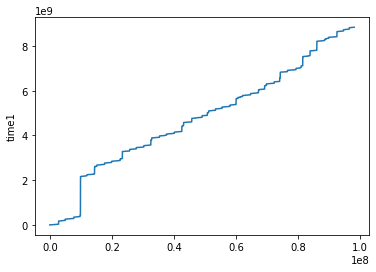

In [29]:
df = pd.read_pickle('/home/dengjiebi/SHL2023/data_pkl/bag_acc_full.pkl')
df['time1']=df['time']-df['time'][0]
df_time = df.loc[np.arange(0,len(df),1000),'time1']
sns.lineplot(data=df_time)

<AxesSubplot:ylabel='time1'>

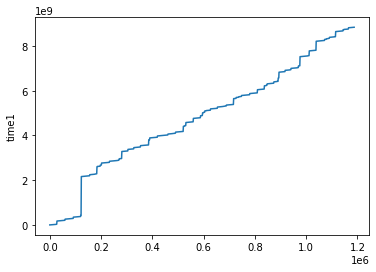

In [30]:
df = pd.read_pickle('/home/dengjiebi/SHL2023/data_pkl/bag_gps_full.pkl')
df['time1']=df['time']-df['time'][0]
df_time = df.loc[np.arange(0,len(df),1000),'time1']
sns.lineplot(data=df_time)

<AxesSubplot:ylabel='time1'>

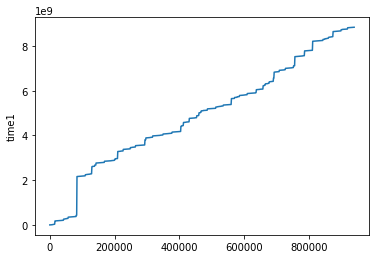

In [31]:
df = pd.read_pickle('/home/dengjiebi/SHL2023/data_pkl/bag_loc_full.pkl')
df['time1']=df['time']-df['time'][0]
df_time = df.loc[np.arange(0,len(df),1000),'time1']
sns.lineplot(data=df_time)

可以发现三个数据集的时间戳跳跃的趋势是相似的。

In [5]:
df = pd.read_pickle('/home/dengjiebi/SHL2023/data_pkl/bag_acc_full.pkl')
df['time_diff']=df['time'].diff()
df.loc[df['time_diff']!=10,'time_diff'].describe()

count    9.110000e+02
mean     8.623221e+06
std      6.647591e+07
min      6.000000e+01
25%      4.521000e+04
50%      1.644500e+05
75%      4.797350e+05
max      1.730050e+09
Name: time_diff, dtype: float64

统计bag_acc_full.pkl文件中的时间戳跳跃，一共出现了911次时间戳跳跃，平均跳跃时间为8623秒（2.4小时），最大跳跃时间为1730050秒（20天）。   

由于大部分训练集中时间戳的跳跃呈现出单调递增的趋势，我们并不需要对这些训练集的数据做特殊处理。但是两个GPS数据集出现了时间戳倒退的现象，分别属于bag和torso。我们的解决方法是<span class="mark">删除掉时间倒退点前后一部分的时间戳并重新计算删除这些点的时间戳（使用线性插补）</span>。由于处理GPS数据的时间戳时会涉及到多个文件的修改，我们把这个问题放到<span class="mark">第三部分</span>解决。

## 验证集情况
### 一般趋势
与训练集不同的是，验证集中出现了大幅度的时间戳跳跃，其中包括两段时间戳倒退。大幅度的时间变化意味着跳跃前后的数据的关联性不强，因此我们<span class="mark">可以通过排序使得时间戳单调递增，而不影响数据的前后关联性</span>。

<AxesSubplot:ylabel='time1'>

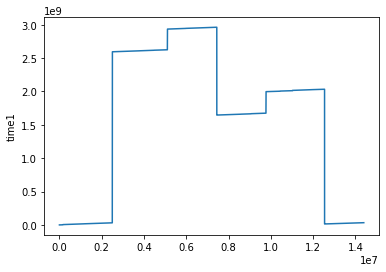

In [15]:
df = pd.read_pickle('/home/dengjiebi/SHL2023/data_validate_pkl/bag_acc_full.pkl')
df['time1']=df['time']-df['time'][0]
df_time = df.loc[np.arange(0,len(df),1000),'time1']
sns.lineplot(data=df_time)

图像说明有几处跳跃的时间段

In [19]:
df[df[["time"]].duplicated(keep=False)]

,time,Acc_x,Acc_y,Acc_z,time1
965602,1497441905080,8.881789,-1.543911,4.158379,14413320
965603,1497441905090,8.892779,-1.549406,4.165911,14413330
965604,1497441905100,8.875656,-1.541866,4.165911,14413340
965605,1497441905110,8.859980,-1.541866,4.161839,14413350
965606,1497441905120,8.827774,-1.541866,4.150840,14413360
...,...,...,...,...,...
14207159,1497458871280,-9.613882,-0.620714,-2.450021,31379520
14207160,1497458871290,-9.517580,-0.612916,-2.428977,31379530
14207161,1497458871300,-9.719059,-0.654774,-2.455213,31379540
14207162,1497458871310,-9.734292,-0.698279,-2.428962,31379550


更加特殊的是，从上表我们可以发现时间戳有大面积的重复（也就是第一段和最后一段）。<span class="mark">第一段和最后一段肯定是属于不同用户的</span>。在时间戳上若要有所区分，应当在某一段加上一个延迟使得时间戳不重复。

### 特殊处理
我们要进行两步处理：  
+ 给最后一段数据的时间戳加上一天的延迟(86400000 ms)，使其与第一段数据区分开，且不会使其与其他段数据的时间戳出现重合现象。  
+ 将所有数据段按时间戳升序排列。

In [55]:
file_dir="../SHL2023/data_validate_pkl/"
names=get_pkl_file_name(file_dir)

pkl文件的数量为:28


In [20]:
#查看时间戳倒退情况
for name in tqdm(names):
    print('------------------Loading {} ------------------'.format(name + '.pkl'))
    df = pd.read_pickle(file_dir + '/' + name + '.pkl')
    df['time_diff']=df['time'].diff()
    print(df[df['time_diff']<0])

  0%|          | 0/28 [00:00<?, ?it/s]

------------------Loading bag_acc_full.pkl ------------------
                   time      Acc_x     Acc_y     Acc_z     time_diff
7443460   1499074032540 -12.572803 -0.352122  2.688949 -1.316001e+09
12540654  1497441905080  -9.559037  0.679953  1.599327 -2.018922e+09
------------------Loading bag_gps_detail_full.pkl ------------------
                  time  id   snr  azimuth  elevation     time_diff
1086195  1499073594062  24   7.0    138.0       24.0 -1.316967e+09
1617147  1497441319478   2  13.0     53.0       29.0 -2.021450e+09
------------------Loading bag_gps_full.pkl ------------------
                 time  number     time_diff
88158   1499073561117       0 -1.317000e+09
147720  1497441319478       2 -2.021450e+09
------------------Loading bag_gyr_full.pkl ------------------
                   time     Gyr_x     Gyr_y     Gyr_z     time_diff
7443460   1499074032540  0.392760 -0.314559  0.169403 -1.316001e+09
12540654  1497441905080  0.228025 -0.077242 -0.017270 -2.018922e+09
-

在更为精准的运动传感器上，可以发现两次时间戳倒退的时间点是完全一致的，这给了我们对验证集所有数据操作的信心。

In [56]:
#加上延迟并排序
for name in tqdm(names):
    print('------------------Loading {} ------------------\n'.format(name + '.pkl'))
    df = pd.read_pickle(file_dir + '/' + name + '.pkl')
    is_duplicated = df.duplicated().sum()
    print('原始数据点有{}处重复\n'.format(is_duplicated))
    is_duplicated = df.duplicated(subset='time').sum()
    print('有{}处时间戳重复\n'.format(is_duplicated))

    df['time_diff'] = df['time'].diff()
    index_df = df[df['time_diff'] < 0].index[1]
    print('第二次时间戳倒退的时间点为第{}项数据\n'.format(index_df))
    print('倒退的时间点为：{}'.format(df['time'][index_df]))
    df.loc[index_df:, 'time'] += 2 * 86400000  # 1 day = 86400 s = 86400000 ms

    is_duplicated = df.duplicated(subset='time').sum()
    print('处理后有{}处时间戳重复\n'.format(is_duplicated))


    df.sort_values('time', inplace=True, ignore_index=True)
    df.drop(labels='time_diff', axis=1, inplace=True)
    df.reset_index(inplace=True,drop=True)
    df.to_pickle('../SHL2023/data_processed/validate/' + name + '.pkl')

  0%|          | 0/28 [00:00<?, ?it/s]

------------------Loading bag_acc_full.pkl ------------------

原始数据点有0处重复

有1505880处时间戳重复

第二次时间戳倒退的时间点为第12540654项数据

倒退的时间点为：1497441905080
处理后有0处时间戳重复

------------------Loading bag_gps_detail_full.pkl ------------------

原始数据点有22处重复

有1705124处时间戳重复

第二次时间戳倒退的时间点为第1617147项数据

倒退的时间点为：1497441319478
处理后有1705098处时间戳重复

------------------Loading bag_gps_full.pkl ------------------

原始数据点有3处重复

有28处时间戳重复

第二次时间戳倒退的时间点为第147720项数据

倒退的时间点为：1497441319478
处理后有2处时间戳重复

------------------Loading bag_gyr_full.pkl ------------------

原始数据点有2处重复

有1505880处时间戳重复

第二次时间戳倒退的时间点为第12540654项数据

倒退的时间点为：1497441905080
处理后有0处时间戳重复

------------------Loading bag_label_full.pkl ------------------

原始数据点有397629处重复

有1505880处时间戳重复

第二次时间戳倒退的时间点为第12540654项数据

倒退的时间点为：1497441905080
处理后有0处时间戳重复

------------------Loading bag_loc_full.pkl ------------------

原始数据点有0处重复

有20处时间戳重复

第二次时间戳倒退的时间点为第104962项数据

倒退的时间点为：1497441464526
处理后有0处时间戳重复

------------------Loading bag_mag_full.pkl ------------------

原始数据点有0处重复

有

pkl文件的数量为:28


  0%|          | 0/28 [00:00<?, ?it/s]

------------------Loading bag_acc_full.pkl ------------------


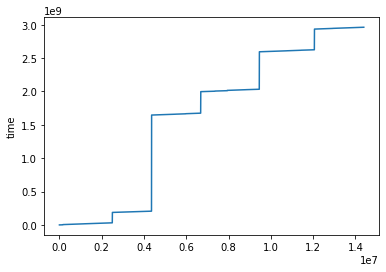

------------------Loading bag_gps_detail_full.pkl ------------------


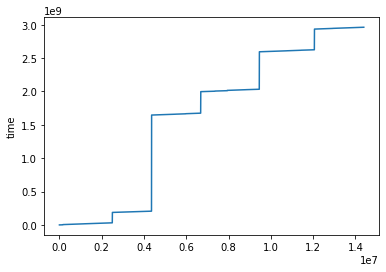

------------------Loading bag_gps_full.pkl ------------------


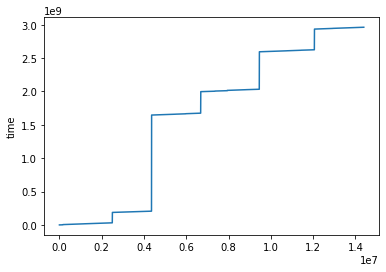

------------------Loading bag_gyr_full.pkl ------------------


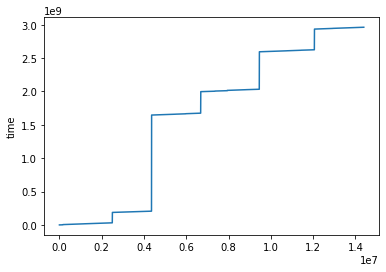

------------------Loading bag_label_full.pkl ------------------


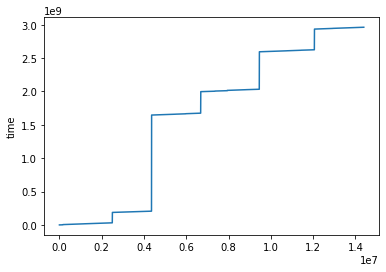

------------------Loading bag_loc_full.pkl ------------------


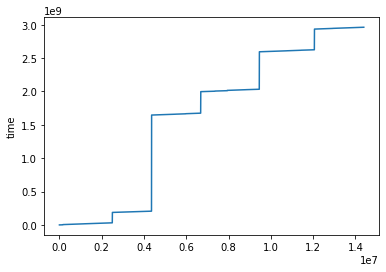

------------------Loading bag_mag_full.pkl ------------------


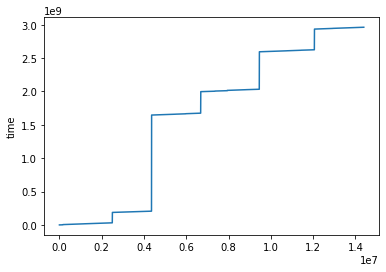

------------------Loading hand_acc_full.pkl ------------------


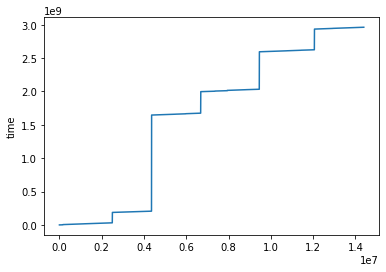

------------------Loading hand_gps_detail_full.pkl ------------------


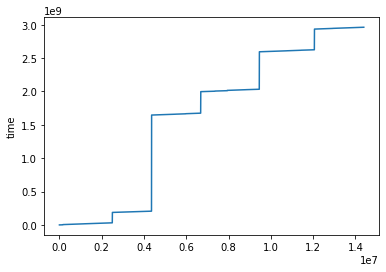

------------------Loading hand_gps_full.pkl ------------------


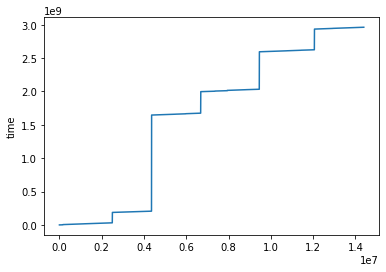

------------------Loading hand_gyr_full.pkl ------------------


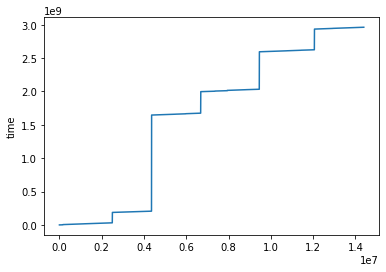

------------------Loading hand_label_full.pkl ------------------


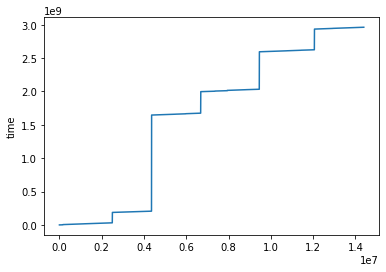

------------------Loading hand_loc_full.pkl ------------------


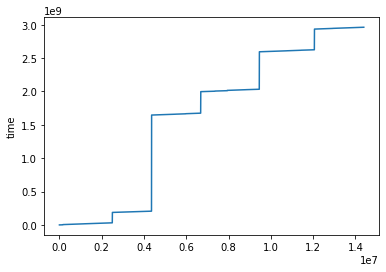

------------------Loading hand_mag_full.pkl ------------------


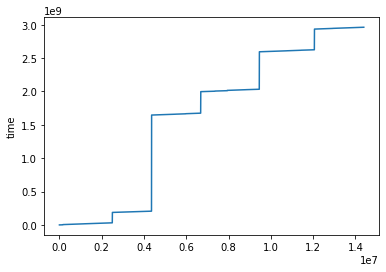

------------------Loading hips_acc_full.pkl ------------------


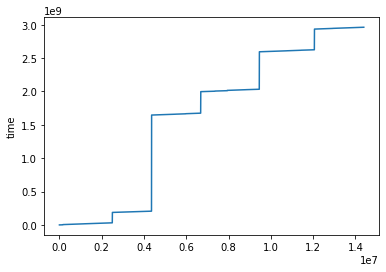

------------------Loading hips_gps_detail_full.pkl ------------------


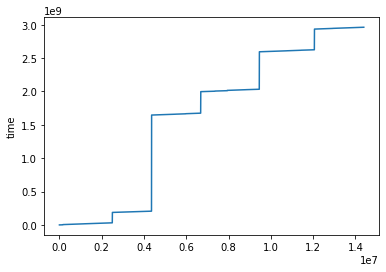

------------------Loading hips_gps_full.pkl ------------------


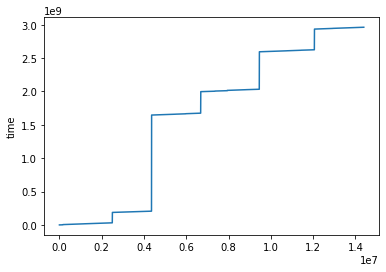

------------------Loading hips_gyr_full.pkl ------------------


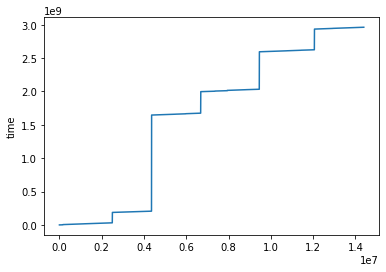

------------------Loading hips_label_full.pkl ------------------


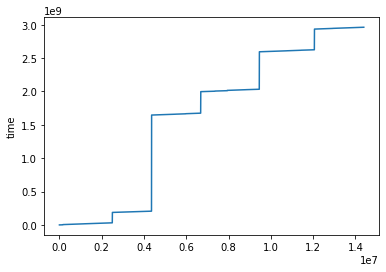

------------------Loading hips_loc_full.pkl ------------------


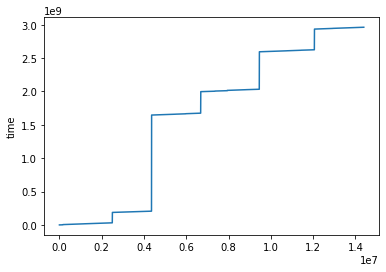

------------------Loading hips_mag_full.pkl ------------------


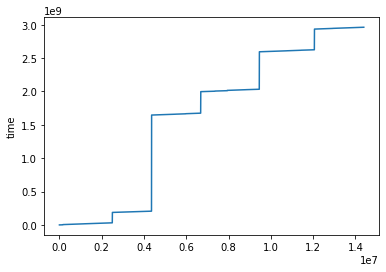

------------------Loading torso_acc_full.pkl ------------------


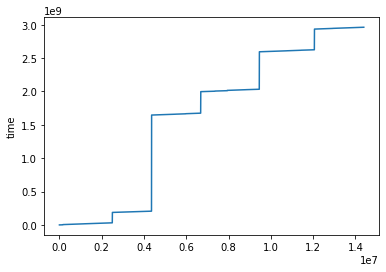

------------------Loading torso_gps_detail_full.pkl ------------------


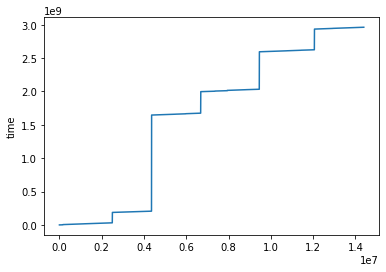

------------------Loading torso_gps_full.pkl ------------------


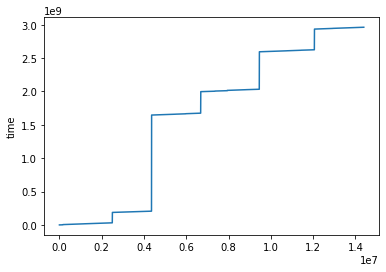

------------------Loading torso_gyr_full.pkl ------------------


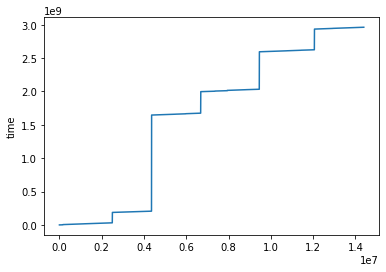

------------------Loading torso_label_full.pkl ------------------


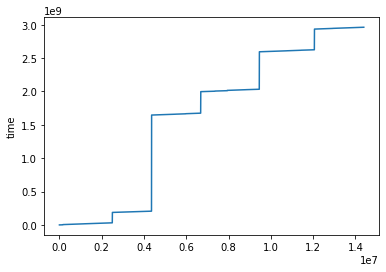

------------------Loading torso_loc_full.pkl ------------------


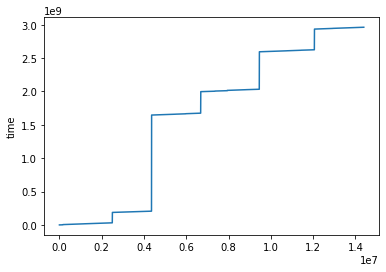

------------------Loading torso_mag_full.pkl ------------------


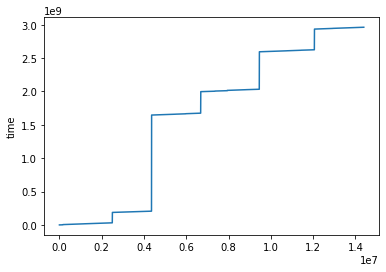

In [46]:
file_dir="../SHL2023/data_processed/validate/"
names=get_pkl_file_name(file_dir)

#查看处理后时间戳排序情况
for name in tqdm(names):
    print('------------------Loading {} ------------------'.format(name + '.pkl'))
    df_time=df['time']-df['time'][0]
    df_time = df_time[np.arange(0,len(df_time),1000)]
    sns.lineplot(data=df_time)
    plt.show()

操作之后发现<span class="mark">非GPS数据的时间戳不再出现重复现象</span>，说明我们的操作是有效的。同时我们发现在GPS数据上出现了少量重复现象，我们将在第四部分解决。下面我们将对GPS数据进行初步的处理。

## 测试集情况

pkl文件的数量为:7


  0%|          | 0/7 [00:00<?, ?it/s]

------------------Loading test_acc.pkl ------------------


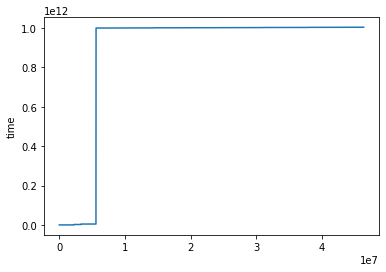

------------------Loading test_gps.pkl ------------------


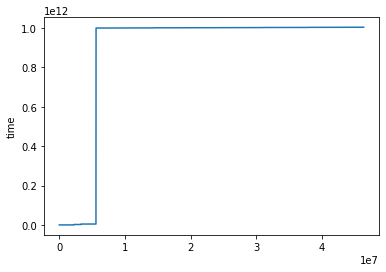

------------------Loading test_gps_detail.pkl ------------------


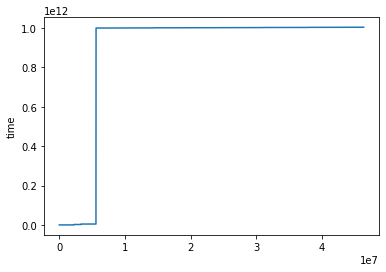

------------------Loading test_gyr.pkl ------------------


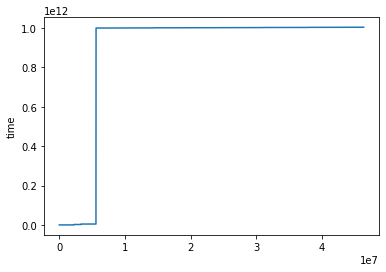

------------------Loading test_label_idx.pkl ------------------


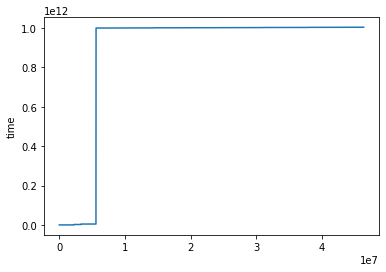

------------------Loading test_loc.pkl ------------------


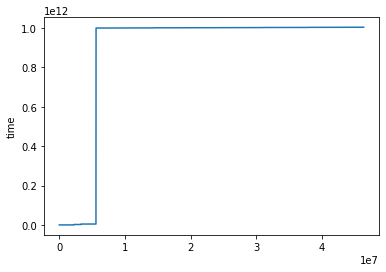

------------------Loading test_mag.pkl ------------------


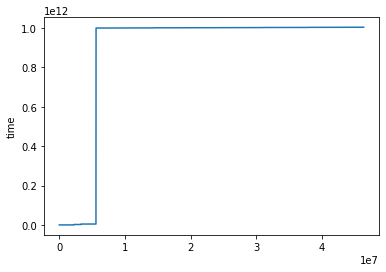

In [6]:
file_dir="../SHL2023/data_test/"
names=get_pkl_file_name(file_dir)

#查看处理后时间戳排序情况
for name in tqdm(names):
    print('------------------Loading {} ------------------'.format(name + '.pkl'))
    df_time=df['time']-df['time'][0]
    df_time = df_time[np.arange(0,len(df_time),1000)]
    sns.lineplot(data=df_time)
    plt.show()

# GPS卫星数据处理 GPS satellite data processing
由于卫星数量发生变化时会引起特征的增加，我们只保留卫星数量以及各个卫星信噪比的特征

## 编写函数与测试

In [9]:
def merge_GPS(df1,df2):
    """
    merge GPS data and GPS detailed data.

    Parameters:
        df1 - GPS data
        df2 - GPS detailed data

    Returns:
        The dataframe obtained by merging data 1 and data 2
    """
    #特征计算
    group_df2 = df2.groupby('time')['snr'].agg([np.mean, np.std, np.max, np.min])
    group_df2.fillna(0,inplace=True)#当数据量为1时，pandas自带的.std()方法计算标准差时会用float类型的nan来表示。我们用0代替NaN。
    group_df2.reset_index(inplace=True)
    
    #数据集合并
    df=pd.merge(df1,group_df2,on='time',how='left')
    df.fillna(0,inplace=True)#这里出现缺失值的原因是卫星数量为0时没有卫星相关的信息。此时的信息应当是全为0。
    df.rename(columns={'mean':'snr_mean','std':'snr_std','amax':'snr_max','amin':'snr_min'},inplace=True)
    return df

In [5]:
df1 = pd.read_pickle('/home/dengjiebi/SHL2023/data_validate_pkl/hand_gps_full.pkl')
df2 = pd.read_pickle('/home/dengjiebi/SHL2023/data_validate_pkl/hand_gps_detail_full.pkl')
df=merge_GPS(df1,df2)
df.head()

,time,number,snr_mean,snr_std,snr_max,snr_min
0,1497426495922,0,0.0,0.000000,0.0,0.0
1,1497426496876,0,0.0,0.000000,0.0,0.0
2,1497426496912,1,31.0,0.000000,31.0,31.0
3,1497426497889,2,29.5,2.121320,31.0,28.0
4,1497426498887,2,30.5,3.535534,33.0,28.0


## 训练集处理

In [47]:
#训练集
file_dir = "../SHL2023/data_pkl/"
df1_list = ['hand_gps_full.pkl', 'torso_gps_full.pkl', 'bag_gps_full.pkl','hips_gps_full.pkl']
df2_list = ['hand_gps_detail_full.pkl', 'torso_gps_detail_full.pkl','bag_gps_detail_full.pkl', 'hips_gps_detail_full.pkl']
df_list = ['hand_gps.pkl', 'torso_gps.pkl', 'bag_gps.pkl', 'hips_gps.pkl']

for i in range(4):
    start = time.time()
    print('__________Loading__________')
    df1 = pd.read_pickle(file_dir + df1_list[i])
    df2 = pd.read_pickle(file_dir + df2_list[i])
    df = merge_GPS(df1, df2)
    df.to_pickle("../SHL2023/data_processed/train/" + df_list[i])
    end = time.time()
    print("数据转化完成，用时 {}s".format(end - start))

__________Loading__________
数据转化完成，用时 10.45484185218811s
__________Loading__________
数据转化完成，用时 8.94190263748169s
__________Loading__________
数据转化完成，用时 7.820101261138916s
__________Loading__________
数据转化完成，用时 8.24677324295044s


接下来我们处理一下训练集中两个GPS数据的时间戳倒退情况。

In [107]:
#bag部位的GPS数据集
df1 = pd.read_pickle('../SHL2023/data_processed/train/bag_gps.pkl')
df1['time_diff']=df1['time'].diff()
df1[df1['time_diff']<0]

,time,number,snr_mean,snr_std,snr_max,snr_min,time_diff
594953,1495331989102,12,19.583333,8.458007,38.0,9.0,-294.0


In [108]:
df1.loc[594950:594960]

,time,number,snr_mean,snr_std,snr_max,snr_min,time_diff
594950,1495331987393,11,21.090909,8.745908,39.0,10.0,996.0
594951,1495331988402,10,22.000000,8.326664,39.0,11.0,1009.0
594952,1495331989396,11,20.818182,8.483138,39.0,11.0,994.0
594953,1495331989102,12,19.583333,8.458007,38.0,9.0,-294.0
594954,1495331990135,12,19.750000,8.465169,38.0,9.0,1033.0
594955,1495331991107,13,19.230769,8.417777,37.0,9.0,972.0
594956,1495331992125,12,20.750000,7.472678,37.0,11.0,1018.0
594957,1495331993105,13,19.846154,7.548136,37.0,9.0,980.0
594958,1495331994098,14,19.642857,8.176958,38.0,8.0,993.0
594959,1495331995101,15,19.133333,8.339807,38.0,9.0,1003.0


该数据集时间倒退时卫星信息状态良好，所以解决的方法是根据前后时间戳数据重新计算该点时间戳数据

In [109]:
df1.loc[594953,'time']=round((df1['time'][594954]+df1['time'][594952])/2)
df1['time_diff']=df1['time'].diff()
df1.loc[594950:594960]

,time,number,snr_mean,snr_std,snr_max,snr_min,time_diff
594950,1495331987393,11,21.090909,8.745908,39.0,10.0,996.0
594951,1495331988402,10,22.000000,8.326664,39.0,11.0,1009.0
594952,1495331989396,11,20.818182,8.483138,39.0,11.0,994.0
594953,1495331989766,12,19.583333,8.458007,38.0,9.0,370.0
594954,1495331990135,12,19.750000,8.465169,38.0,9.0,369.0
594955,1495331991107,13,19.230769,8.417777,37.0,9.0,972.0
594956,1495331992125,12,20.750000,7.472678,37.0,11.0,1018.0
594957,1495331993105,13,19.846154,7.548136,37.0,9.0,980.0
594958,1495331994098,14,19.642857,8.176958,38.0,8.0,993.0
594959,1495331995101,15,19.133333,8.339807,38.0,9.0,1003.0


In [110]:
df1.drop(labels='time_diff', axis=1, inplace=True)
df1.to_pickle('../SHL2023/data_processed/train/bag_gps.pkl')

In [111]:
#torso部位的GPS数据集
df2 = pd.read_pickle('../SHL2023/data_processed/train/torso_gps.pkl')
df2['time_diff']=df2['time'].diff()
df2[df2['time_diff']<0]

,time,number,snr_mean,snr_std,snr_max,snr_min,time_diff


In [59]:
df2.loc[74544:74554]

,time,number,snr_mean,snr_std,snr_max,snr_min,time_diff
74544,1490697239073,0,0.0,0.0,0.0,0.0,1006.0
74545,1490697240063,0,0.0,0.0,0.0,0.0,990.0
74546,1490697241064,0,0.0,0.0,0.0,0.0,1001.0
74547,1490697242067,0,0.0,0.0,0.0,0.0,1003.0
74548,1490697243067,0,0.0,0.0,0.0,0.0,1000.0
74549,1490697240730,0,0.0,0.0,0.0,0.0,-2337.0
74550,1490697241720,0,0.0,0.0,0.0,0.0,990.0
74551,1490697242719,0,0.0,0.0,0.0,0.0,999.0
74552,1490697243725,0,0.0,0.0,0.0,0.0,1006.0
74553,1490697244720,0,0.0,0.0,0.0,0.0,995.0


注意到出现倒退前后的GPS数据不能接收到卫星信息，所以出现倒退的原因是因为无卫星信号导致的估算出错。解决方法是根据有卫星信号的时刻重新估算时间戳。（本质上没有影响）

In [60]:
df2_1=df2.loc[df2['number']!=0]
df2_1.loc[74000:75000]

,time,number,snr_mean,snr_std,snr_max,snr_min,time_diff
74421,1490697116080,1,9.000000,0.000000,9.0,9.0,1000.0
74426,1490697121084,1,10.000000,0.000000,10.0,10.0,1000.0
74427,1490697122082,1,10.000000,0.000000,10.0,10.0,998.0
74864,1490698464449,1,10.000000,0.000000,10.0,10.0,1015.0
74865,1490698465453,2,21.000000,5.656854,25.0,17.0,1004.0
...,...,...,...,...,...,...,...
74996,1490698595843,11,19.000000,3.898718,23.0,9.0,997.0
74997,1490698596837,11,19.090909,4.036200,23.0,9.0,994.0
74998,1490698597848,12,18.416667,4.699291,24.0,9.0,1011.0
74999,1490698598844,13,17.923077,5.106557,24.0,9.0,996.0


由上图可以得知倒退时间戳前后重新拥有卫星信息的的数据分别为第74427项和第74864项

In [61]:
#计算线性插值每一项的跳跃
idx_diff=74864-74427
time_diff=1490698464449-1490697122082
step=time_diff/(idx_diff)
step

3071.7780320366132

In [62]:
time=[]
tmp=1490697122082
for i in range(74428,74864):
    tmp+=step
    time.append(round(tmp))

In [63]:
df2.loc[74428:74863,'time']=time
df2['time_diff']=df2['time'].diff()
df2.loc[74544:74554]

,time,number,snr_mean,snr_std,snr_max,snr_min,time_diff
74544,1490697481480,0,0.0,0.0,0.0,0.0,3072.0
74545,1490697484552,0,0.0,0.0,0.0,0.0,3072.0
74546,1490697487624,0,0.0,0.0,0.0,0.0,3072.0
74547,1490697490695,0,0.0,0.0,0.0,0.0,3071.0
74548,1490697493767,0,0.0,0.0,0.0,0.0,3072.0
74549,1490697496839,0,0.0,0.0,0.0,0.0,3072.0
74550,1490697499911,0,0.0,0.0,0.0,0.0,3072.0
74551,1490697502982,0,0.0,0.0,0.0,0.0,3071.0
74552,1490697506054,0,0.0,0.0,0.0,0.0,3072.0
74553,1490697509126,0,0.0,0.0,0.0,0.0,3072.0


In [64]:
df2.drop(labels='time_diff', axis=1, inplace=True)
df2.to_pickle('../SHL2023/data_processed/train/torso_gps.pkl')

## 验证集

In [72]:
#验证集
file_dir = "../SHL2023/data_processed/validate/"
df1_list = ['hand_gps_full.pkl', 'torso_gps_full.pkl', 'bag_gps_full.pkl','hips_gps_full.pkl']
df2_list = ['hand_gps_detail_full.pkl', 'torso_gps_detail_full.pkl','bag_gps_detail_full.pkl', 'hips_gps_detail_full.pkl']
df_list = ['hand_gps.pkl', 'torso_gps.pkl', 'bag_gps.pkl', 'hips_gps.pkl']

for i in range(4):
    start = time.time()
    print('__________Loading__________')
    df1 = pd.read_pickle(file_dir + df1_list[i])
    df2 = pd.read_pickle(file_dir + df2_list[i])
    df = merge_GPS(df1, df2)
    df.to_pickle("../SHL2023/data_processed/validate/" + df_list[i])
    end = time.time()
    print("数据转化完成，用时 {}s".format(end - start))

__________Loading__________
数据转化完成，用时 0.2974724769592285s
__________Loading__________
数据转化完成，用时 0.21510672569274902s
__________Loading__________
数据转化完成，用时 0.23590445518493652s
__________Loading__________
数据转化完成，用时 0.20918035507202148s


## 测试集

In [10]:
df1 = pd.read_pickle('/home/dengjiebi/SHL2023/data_test/test_gps.pkl')
df2 = pd.read_pickle('/home/dengjiebi/SHL2023/data_test/test_gps_detail.pkl')
df=merge_GPS(df1,df2)
df.head()

,time,number,snr_mean,snr_std,snr_max,snr_min
0,2497349206420,0,0.0,0.0,0.0,0.0
1,2497349207381,0,0.0,0.0,0.0,0.0
2,2497349208373,0,0.0,0.0,0.0,0.0
3,2497349209367,0,0.0,0.0,0.0,0.0
4,2497349210383,0,0.0,0.0,0.0,0.0


In [11]:
time_diff=df['time'].diff()
df[time_diff<0]

,time,number,snr_mean,snr_std,snr_max,snr_min


没有倒退现象

In [13]:
df.isnull().sum()

time        0
number      0
snr_mean    0
snr_std     0
snr_max     0
snr_min     0
dtype: int64

In [22]:
df[df.duplicated(keep=False)]

,time,number,snr_mean,snr_std,snr_max,snr_min
217099,3498212860837,5,33.8,5.940445,39.0,23.0
217100,3498212860837,5,33.8,5.940445,39.0,23.0
316200,3498813378279,6,28.0,4.390071,37.0,24.0
316201,3498813378279,6,28.0,4.390071,37.0,24.0
465301,3500021056726,5,17.2,4.289522,25.0,14.0
465302,3500021056726,5,17.2,4.289522,25.0,14.0


出现部分重复值，需要删除。

In [23]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [25]:
df.to_pickle('/home/dengjiebi/SHL2023/data_GPS/test_gps.pkl')

# 重复值处理 Duplicate value processing
重复值出现在验证集中的GPS数据中，处理方法是删除。

In [65]:
file_dir="../SHL2023/data_processed/validate/"
names=get_pkl_file_name(file_dir)

pkl文件的数量为:32


In [66]:
for name in tqdm(names):
    print('------------------Loading {} ------------------\n'.format(name + '.pkl'))
    df = pd.read_pickle(file_dir + '/' + name + '.pkl')
    is_duplicated = df.duplicated().sum()
    print('数据点有{}处重复\n'.format(is_duplicated))

  0%|          | 0/32 [00:00<?, ?it/s]

------------------Loading bag_acc_full.pkl ------------------

数据点有0处重复

------------------Loading bag_gps.pkl ------------------

数据点有0处重复

------------------Loading bag_gps_detail_full.pkl ------------------

数据点有19处重复

------------------Loading bag_gps_full.pkl ------------------

数据点有2处重复

------------------Loading bag_gyr_full.pkl ------------------

数据点有0处重复

------------------Loading bag_label_full.pkl ------------------

数据点有0处重复

------------------Loading bag_loc_full.pkl ------------------

数据点有0处重复

------------------Loading bag_mag_full.pkl ------------------

数据点有0处重复

------------------Loading hand_acc_full.pkl ------------------

数据点有0处重复

------------------Loading hand_gps.pkl ------------------

数据点有0处重复

------------------Loading hand_gps_detail_full.pkl ------------------

数据点有6处重复

------------------Loading hand_gps_full.pkl ------------------

数据点有1处重复

------------------Loading hand_gyr_full.pkl ------------------

数据点有0处重复

------------------Loading hand_label_fu

由于gps文件由gps_detail_full文件和gps_full文件合并而来，只需要处理gps文件的重复值。

In [78]:
df = pd.read_pickle('../SHL2023/data_processed/validate/bag_gps.pkl')
df[df.duplicated(subset='time',keep=False)]

,time,number,snr_mean,snr_std,snr_max,snr_min


In [77]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.to_pickle('../SHL2023/data_processed/validate/bag_gps.pkl')

In [79]:
df = pd.read_pickle('../SHL2023/data_processed/validate/hand_gps.pkl')
df[df.duplicated(subset='time',keep=False)]

,time,number,snr_mean,snr_std,snr_max,snr_min
82216,1499424739910,6,34.833333,2.855086,37.0,29.0
82217,1499424739910,6,34.833333,2.855086,37.0,29.0


In [80]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.to_pickle('../SHL2023/data_processed/validate/hand_gps.pkl')

In [81]:
df = pd.read_pickle('../SHL2023/data_processed/validate/hips_gps.pkl')
df[df.duplicated(subset='time',keep=False)]

,time,number,snr_mean,snr_std,snr_max,snr_min
8,1497426503558,6,23.833333,7.171070,37.0,16.0
9,1497426503558,6,23.833333,7.171070,37.0,16.0
32607,1497614684055,5,28.000000,3.464102,32.0,22.0
32608,1497614684055,5,28.000000,3.464102,32.0,22.0


In [82]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.to_pickle('../SHL2023/data_processed/validate/hips_gps.pkl')

In [83]:
df = pd.read_pickle('../SHL2023/data_processed/validate/torso_gps.pkl')
df[df.duplicated(subset='time',keep=False)]

,time,number,snr_mean,snr_std,snr_max,snr_min
64209,1499097612291,5,22.0,3.711843,27.0,16.0
64210,1499097612291,5,22.0,3.711843,27.0,16.0
82630,1499443759640,5,21.8,7.405704,29.0,9.0
82631,1499443759640,5,21.8,7.405704,29.0,9.0


In [84]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.to_pickle('../SHL2023/data_processed/validate/torso_gps.pkl')

# 时间同步 Time synchronization
+ 在一定的时间公差内对齐GPS数据和位置数据，得到新的数据集A
+ 尝试将数据集A与运动传感器的时间戳进行对齐，缺失值标记为GPS信号丢失（创建一个新的特征）
+ 对形成的新的数据集中的缺失值进行插补

## 训练集

In [3]:
#读取运动传感器的时间戳序列,后续训练集的合并中可以通用。
datetime=pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/train/bag_acc.pkl')
datetime=pd.to_datetime(datetime['time'], unit="ms")

In [4]:
datetime

0          2017-03-25 08:46:22.760
100        2017-03-25 08:46:23.760
200        2017-03-25 08:46:24.760
300        2017-03-25 08:46:25.760
400        2017-03-25 08:46:26.760
                     ...          
98052000   2017-07-05 15:17:28.080
98052100   2017-07-05 15:17:29.080
98052200   2017-07-05 15:17:30.080
98052300   2017-07-05 15:17:31.080
98052400   2017-07-05 15:17:32.080
Name: time, Length: 980525, dtype: datetime64[ns]

### bag

In [ ]:
df1=pd.read_pickle('../SHL2023/data_processed/train/bag_gps.pkl')
df2=pd.read_pickle('../SHL2023/data_pkl/bag_loc_full.pkl')
datetime1=pd.to_datetime(df1['time'], unit="ms")
df1['time']=datetime1
datetime2=pd.to_datetime(df2['time'], unit="ms")
df2['time']=datetime2

In [3]:
missing_ratio=[]
time_delay=['100ms','200ms','500ms','1s','3s','5s','10s']
for delay in time_delay:
    df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta(delay),direction='nearest')
    missing_ratio.append(df['accuracy'].isnull().sum()/len(df))

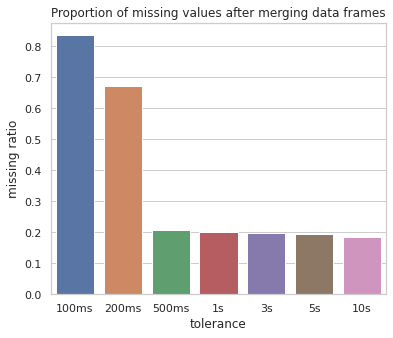

In [4]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,5))
sns.barplot(x=time_delay, y=missing_ratio, palette="deep")
plt.xlabel('tolerance')
plt.ylabel('missing ratio')
plt.title('Proportion of missing values after merging data frames')
plt.show()

不同容许时间下的合并后数据集缺失值不同，根据上图我们选择容许公差为1秒，此时合并后数据缺失比例为20%左右。

In [5]:
#容许公差为1s，方向为'nearest'
df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')

In [6]:
df.head(20)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude
0,2017-03-25 08:36:12.836,4,21.000000,3.559026,24.0,17.0,NaN,NaN,NaN,NaN
1,2017-03-25 08:36:13.834,4,20.750000,3.304038,24.0,17.0,NaN,NaN,NaN,NaN
2,2017-03-25 08:36:14.835,4,21.250000,2.629956,24.0,19.0,NaN,NaN,NaN,NaN
3,2017-03-25 08:36:15.833,4,21.250000,2.629956,24.0,19.0,NaN,NaN,NaN,NaN
4,2017-03-25 08:36:16.823,4,20.750000,3.201562,24.0,18.0,NaN,NaN,NaN,NaN
5,2017-03-25 08:36:17.829,4,20.750000,3.201562,24.0,18.0,NaN,NaN,NaN,NaN
6,2017-03-25 08:36:18.831,4,20.750000,3.201562,24.0,18.0,NaN,NaN,NaN,NaN
7,2017-03-25 08:36:19.826,4,21.000000,2.943920,24.0,18.0,NaN,NaN,NaN,NaN
8,2017-03-25 08:36:20.828,4,21.000000,2.943920,24.0,18.0,NaN,NaN,NaN,NaN
9,2017-03-25 08:36:21.838,5,19.200000,4.438468,24.0,13.0,NaN,NaN,NaN,NaN


In [9]:
df_full=pd.merge_asof(datetime,df,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')

In [10]:
df_full['accuracy'].isnull().sum()/len(df_full)

0.29277849266736233

In [11]:
df_full['number'].isnull().sum()/len(df_full)

0.1582558610118394

<span class="mark">采取容许公差为1秒时，运动传感器与GPS对齐后缺失值占比上升到0.3左右</span>，采取容许公差为5秒时缺失值占比同样上升到0.3左右，最终就采取采取容许公差为1秒。  
后面根据时间索引进行插值。

In [12]:
#缺失值标记为GPS信号丢失（创建一个新的特征）
df_full['is_GPS_exist']=1
df_full.loc[df_full['accuracy'].isnull(),'is_GPS_exist']=0

In [13]:
df_full.set_index('time',inplace=True)

In [14]:
df_full.interpolate(method='time',inplace=True)

In [15]:
df_full.reset_index(inplace=True)

In [16]:
df_full.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude,is_GPS_exist
0,2017-03-25 08:46:22.760,12.0,22.75,7.955844,36.0,12.0,16.0,50.846879,-0.133339,132.073816,1
1,2017-03-25 08:46:22.770,12.0,22.75,7.955844,36.0,12.0,16.0,50.846879,-0.133339,132.073816,1
2,2017-03-25 08:46:22.780,12.0,22.75,7.955844,36.0,12.0,16.0,50.846879,-0.133339,132.073816,1
3,2017-03-25 08:46:22.790,12.0,22.75,7.955844,36.0,12.0,16.0,50.846879,-0.133339,132.073816,1
4,2017-03-25 08:46:22.800,12.0,22.75,7.955844,36.0,12.0,16.0,50.846879,-0.133339,132.073816,1


In [17]:
df_full.isnull().sum()

time            0
number          0
snr_mean        0
snr_std         0
snr_max         0
snr_min         0
accuracy        0
latitude        0
longitude       0
altitude        0
is_GPS_exist    0
dtype: int64

In [18]:
df_full.to_pickle('../SHL2023/data_processed/train/bag_gps_and_loc.pkl')

### hand

In [30]:
df1=pd.read_pickle('../SHL2023/data_processed/train/hand_gps.pkl')
df2=pd.read_pickle('../SHL2023/data_pkl/hand_loc_full.pkl')
datetime1=pd.to_datetime(df1['time'], unit="ms")
df1['time']=datetime1
datetime2=pd.to_datetime(df2['time'], unit="ms")
df2['time']=datetime2

In [31]:
missing_ratio=[]
time_delay=['100ms','200ms','500ms','1s','3s','5s','10s']
for delay in time_delay:
    df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta(delay),direction='nearest')
    missing_ratio.append(df['accuracy'].isnull().sum()/len(df))

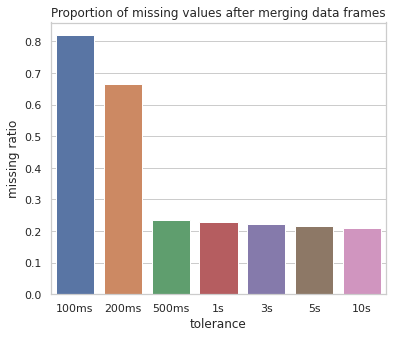

In [32]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,5))
sns.barplot(x=time_delay, y=missing_ratio, palette="deep")
plt.xlabel('tolerance')
plt.ylabel('missing ratio')
plt.title('Proportion of missing values after merging data frames')
plt.show()

In [33]:
#容许公差为1s，方向为'nearest'
df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')

In [34]:
df_full=pd.merge_asof(datetime,df,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')

In [35]:
df_full['accuracy'].isnull().sum()/len(df_full)

0.19138494037241582

In [36]:
df_full['number'].isnull().sum()/len(df_full)

0.007588572147487042

In [38]:
#缺失值标记为GPS信号丢失（创建一个新的特征）
df_full['is_GPS_exist']=1
df_full.loc[df_full['accuracy'].isnull(),'is_GPS_exist']=0

df_full.set_index('time',inplace=True)
df_full.interpolate(method='time',inplace=True)
df_full.reset_index(inplace=True)
df_full.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude,is_GPS_exist
0,2017-03-25 08:46:22.760,7.0,31.0,7.187953,41.0,24.0,64.0,50.84686,-0.133593,191.368652,1
1,2017-03-25 08:46:22.770,7.0,31.0,7.187953,41.0,24.0,64.0,50.84686,-0.133593,191.368652,1
2,2017-03-25 08:46:22.780,7.0,31.0,7.187953,41.0,24.0,64.0,50.84686,-0.133593,191.368652,1
3,2017-03-25 08:46:22.790,7.0,31.0,7.187953,41.0,24.0,64.0,50.84686,-0.133593,191.368652,1
4,2017-03-25 08:46:22.800,7.0,31.0,7.187953,41.0,24.0,64.0,50.84686,-0.133593,191.368652,1


In [39]:
df_full.isnull().sum()

time            0
number          0
snr_mean        0
snr_std         0
snr_max         0
snr_min         0
accuracy        0
latitude        0
longitude       0
altitude        0
is_GPS_exist    0
dtype: int64

In [40]:
df_full.to_pickle('../SHL2023/data_processed/train/hand_gps_and_loc.pkl')

### hips

In [2]:
df1=pd.read_pickle('../SHL2023/data_processed/train/hips_gps.pkl')
df2=pd.read_pickle('../SHL2023/data_pkl/hips_loc_full.pkl')
datetime1=pd.to_datetime(df1['time'], unit="ms")
df1['time']=datetime1
datetime2=pd.to_datetime(df2['time'], unit="ms")
df2['time']=datetime2

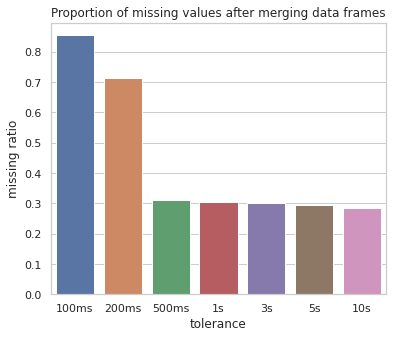

In [3]:
missing_ratio=[]
time_delay=['100ms','200ms','500ms','1s','3s','5s','10s']
for delay in time_delay:
    df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta(delay),direction='nearest')
    missing_ratio.append(df['accuracy'].isnull().sum()/len(df))
    
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,5))
sns.barplot(x=time_delay, y=missing_ratio, palette="deep")
plt.xlabel('tolerance')
plt.ylabel('missing ratio')
plt.title('Proportion of missing values after merging data frames')
plt.show()

In [6]:
#容许公差为1s，方向为'nearest'
df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')
df_full=pd.merge_asof(datetime,df,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')

In [6]:
print('accuracy的缺失值占比为:{}\n'.format(df_full['accuracy'].isnull().sum()/len(df_full)))
print('number的缺失值占比为:{}\n'.format(df_full['number'].isnull().sum()/len(df_full)))

accuracy的缺失值占比为:0.3189936286948826

number的缺失值占比为:0.08915732416566735



In [7]:
#缺失值标记为GPS信号丢失（创建一个新的特征）
df_full['is_GPS_exist']=1
df_full.loc[df_full['accuracy'].isnull(),'is_GPS_exist']=0

df_full.set_index('time',inplace=True)
df_full.interpolate(method='time',inplace=True)
df_full.reset_index(inplace=True)
df_full.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude,is_GPS_exist
0,2017-03-25 08:46:22.760,4.0,22.5,5.686241,29.0,16.0,NaN,NaN,NaN,NaN,0
1,2017-03-25 08:46:22.770,4.0,22.5,5.686241,29.0,16.0,NaN,NaN,NaN,NaN,0
2,2017-03-25 08:46:22.780,4.0,22.5,5.686241,29.0,16.0,NaN,NaN,NaN,NaN,0
3,2017-03-25 08:46:22.790,4.0,22.5,5.686241,29.0,16.0,NaN,NaN,NaN,NaN,0
4,2017-03-25 08:46:22.800,4.0,22.5,5.686241,29.0,16.0,NaN,NaN,NaN,NaN,0


In [8]:
df_full.isnull().sum()

time               0
number             0
snr_mean           0
snr_std            0
snr_max            0
snr_min            0
accuracy        7485
latitude        7485
longitude       7485
altitude        7485
is_GPS_exist       0
dtype: int64

In [9]:
df_full.loc[df_full['accuracy'].notnull(),'accuracy']

7485        64.0
7486        64.0
7487        64.0
7488        64.0
7489        64.0
            ... 
98052433     8.0
98052434     8.0
98052435     8.0
98052436     8.0
98052437     8.0
Name: accuracy, Length: 98044953, dtype: float64

我们注意到0到7484的accuracy等数据是缺失的，这与一开始数据就缺失导致interpolate函数无法插补最前面的值有关.由于缺失值过多，所以考虑使用bag_gps_and_loc.pkl中的gps信息作为填补手段。

In [10]:
df3=pd.read_pickle('/home/ossdata/dengjiebi/data_processed/train/bag_gps_and_loc.pkl')

In [11]:
df_full.loc[0:7484,'accuracy'] = df3.loc[0:7484,'accuracy']
df_full.loc[0:7484,'latitude'] = df3.loc[0:7484,'latitude']
df_full.loc[0:7484,'longitude'] = df3.loc[0:7484,'longitude']
df_full.loc[0:7484,'altitude'] = df3.loc[0:7484,'altitude']
df_full.isnull().sum()

time            0
number          0
snr_mean        0
snr_std         0
snr_max         0
snr_min         0
accuracy        0
latitude        0
longitude       0
altitude        0
is_GPS_exist    0
dtype: int64

In [12]:
df_full.to_pickle('/home/ossdata/dengjiebi/data_processed/train/hips_gps_and_loc.pkl')

### torso

In [13]:
df1=pd.read_pickle('../SHL2023/data_processed/train/torso_gps.pkl')
df2=pd.read_pickle('../SHL2023/data_pkl/torso_loc_full.pkl')
datetime1=pd.to_datetime(df1['time'], unit="ms")
df1['time']=datetime1
datetime2=pd.to_datetime(df2['time'], unit="ms")
df2['time']=datetime2

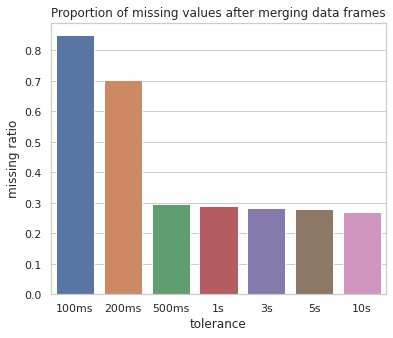

In [14]:
missing_ratio=[]
time_delay=['100ms','200ms','500ms','1s','3s','5s','10s']
for delay in time_delay:
    df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta(delay),direction='nearest')
    missing_ratio.append(df['accuracy'].isnull().sum()/len(df))
    
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,5))
sns.barplot(x=time_delay, y=missing_ratio, palette="deep")
plt.xlabel('tolerance')
plt.ylabel('missing ratio')
plt.title('Proportion of missing values after merging data frames')
plt.show()

In [15]:
#容许公差为1s，方向为'nearest'
df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')
df_full=pd.merge_asof(datetime,df,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')

In [32]:
print('accuracy的缺失值占比为:{}\n'.format(df_full['accuracy'].isnull().sum()/len(df_full)))
print('number的缺失值占比为:{}\n'.format(df_full['number'].isnull().sum()/len(df_full)))

accuracy的缺失值占比为:0.2933645872221963

number的缺失值占比为:0.08087324661932424



In [33]:
df_full

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude
0,2017-03-25 08:46:22.760,0.0,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
1,2017-03-25 08:46:22.770,0.0,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
2,2017-03-25 08:46:22.780,0.0,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
3,2017-03-25 08:46:22.790,0.0,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
4,2017-03-25 08:46:22.800,0.0,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
98052433,2017-07-05 15:17:32.410,15.0,24.133333,8.584593,36.0,9.0,4.0,50.845835,-0.13324,122.17823
98052434,2017-07-05 15:17:32.420,15.0,24.133333,8.584593,36.0,9.0,4.0,50.845835,-0.13324,122.17823
98052435,2017-07-05 15:17:32.430,15.0,24.133333,8.584593,36.0,9.0,4.0,50.845835,-0.13324,122.17823
98052436,2017-07-05 15:17:32.440,15.0,24.133333,8.584593,36.0,9.0,4.0,50.845835,-0.13324,122.17823


In [16]:
#缺失值标记为GPS信号丢失（创建一个新的特征）
df_full['is_GPS_exist']=1
df_full.loc[df_full['accuracy'].isnull(),'is_GPS_exist']=0
df_full.set_index('time',inplace=True)
df_full.interpolate(method='time',inplace=True)
df_full.reset_index(inplace=True)
df_full.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude,is_GPS_exist
0,2017-03-25 08:46:22.760,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
1,2017-03-25 08:46:22.770,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
2,2017-03-25 08:46:22.780,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
3,2017-03-25 08:46:22.790,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
4,2017-03-25 08:46:22.800,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0


In [17]:
df_full.isnull().sum()

time                0
number              0
snr_mean            0
snr_std             0
snr_max             0
snr_min             0
accuracy        13936
latitude        13936
longitude       13936
altitude        13936
is_GPS_exist        0
dtype: int64

In [18]:
df_full.loc[df_full['accuracy'].notnull(),'accuracy']

13936       128.0
13937       128.0
13938       128.0
13939       128.0
13940       128.0
            ...  
98052433      4.0
98052434      4.0
98052435      4.0
98052436      4.0
98052437      4.0
Name: accuracy, Length: 98038502, dtype: float64

和上一个数据集是同一个情况.由于缺失值过多，所以考虑使用bag_gps_and_loc.pkl中的gps信息作为填补手段。

In [19]:
df_full.loc[0:13935,'accuracy']=df3.loc[0:13935,'accuracy']
df_full.loc[0:13935,'latitude']=df3.loc[0:13935,'latitude']
df_full.loc[0:13935,'longitude']=df3.loc[0:13935,'longitude']
df_full.loc[0:13935,'altitude']=df3.loc[0:13935,'altitude']

In [20]:
df_full.isnull().sum()

time            0
number          0
snr_mean        0
snr_std         0
snr_max         0
snr_min         0
accuracy        0
latitude        0
longitude       0
altitude        0
is_GPS_exist    0
dtype: int64

In [21]:
df_full.to_pickle('/home/ossdata/dengjiebi/data_processed/train/torso_gps_and_loc.pkl')

## 验证集
### bag

In [8]:
#读取运动传感器的时间戳序列,后续训练集的合并中可以通用。
datetime=pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/validate/bag_acc.pkl')
datetime=pd.to_datetime(datetime['time'], unit="ms")

In [9]:
datetime

0          2017-06-14 08:04:51.760
100        2017-06-14 08:04:52.760
200        2017-06-14 08:04:53.760
300        2017-06-14 08:04:54.760
400        2017-06-14 08:04:55.760
                     ...          
14395500   2017-07-18 15:00:28.760
14395600   2017-07-18 15:00:29.760
14395700   2017-07-18 15:00:30.760
14395800   2017-07-18 15:00:31.760
14395900   2017-07-18 15:00:32.760
Name: time, Length: 143960, dtype: datetime64[ns]

In [11]:
df1=pd.read_pickle('../SHL2023/data_GPS/validate/bag_gps.pkl')
df2=pd.read_pickle('../SHL2023/data_GPS/validate/bag_loc_full.pkl')
datetime1=pd.to_datetime(df1['time'], unit="ms")
df1['time']=datetime1
datetime2=pd.to_datetime(df2['time'], unit="ms")
df2['time']=datetime2

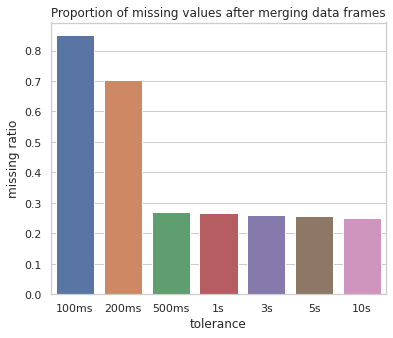

In [12]:
missing_ratio=[]
time_delay=['100ms','200ms','500ms','1s','3s','5s','10s']
for delay in time_delay:
    df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta(delay),direction='nearest')
    missing_ratio.append(df['accuracy'].isnull().sum()/len(df))
    
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,5))
sns.barplot(x=time_delay, y=missing_ratio, palette="deep")
plt.xlabel('tolerance')
plt.ylabel('missing ratio')
plt.title('Proportion of missing values after merging data frames')
plt.show()

In [13]:
#容许公差为1s，方向为'nearest'
df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')
df_full=pd.merge_asof(datetime,df,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')

In [14]:
print('accuracy的缺失值占比为:{}\n'.format(df_full['accuracy'].isnull().sum()/len(df_full)))
print('number的缺失值占比为:{}\n'.format(df_full['number'].isnull().sum()/len(df_full)))

accuracy的缺失值占比为:0.3153931647679911

number的缺失值占比为:0.09444290080577938



In [15]:
df_full.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude
0,2017-06-14 08:04:51.760,18.0,27.111111,7.991826,39.0,12.0,6.0,50.826629,-0.119805,140.742119
1,2017-06-14 08:04:52.760,18.0,27.055556,8.192337,40.0,11.0,6.0,50.826639,-0.119795,140.815679
2,2017-06-14 08:04:53.760,18.0,27.222222,8.342348,40.0,11.0,6.0,50.826648,-0.119788,140.937801
3,2017-06-14 08:04:54.760,18.0,28.500000,8.111357,39.0,11.0,6.0,50.826655,-0.119784,141.042916
4,2017-06-14 08:04:55.760,18.0,29.777778,8.633420,44.0,11.0,4.0,50.826665,-0.119778,141.114485


In [38]:
#缺失值标记为GPS信号丢失（创建一个新的特征）
df_full['is_GPS_exist']=1
df_full.loc[df_full['accuracy'].isnull(),'is_GPS_exist']=0
df_full.set_index('time',inplace=True)
df_full.interpolate(method='time',inplace=True)
df_full.reset_index(inplace=True)
df_full.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude,is_GPS_exist
0,2017-06-14 08:04:51.760,18.0,27.111111,7.991826,39.0,12.0,6.0,50.826629,-0.119805,140.742119,1
1,2017-06-14 08:04:51.770,18.0,27.111111,7.991826,39.0,12.0,6.0,50.826629,-0.119805,140.742119,1
2,2017-06-14 08:04:51.780,18.0,27.111111,7.991826,39.0,12.0,6.0,50.826629,-0.119805,140.742119,1
3,2017-06-14 08:04:51.790,18.0,27.111111,7.991826,39.0,12.0,6.0,50.826629,-0.119805,140.742119,1
4,2017-06-14 08:04:51.800,18.0,27.111111,7.991826,39.0,12.0,6.0,50.826629,-0.119805,140.742119,1


In [39]:
df_full.isnull().sum()

time            0
number          0
snr_mean        0
snr_std         0
snr_max         0
snr_min         0
accuracy        0
latitude        0
longitude       0
altitude        0
is_GPS_exist    0
dtype: int64

In [40]:
df_full.to_pickle('/home/ossdata/dengjiebi/data_processed/validate/bag_gps_and_loc.pkl')

### hand

In [41]:
df1=pd.read_pickle('../SHL2023/data_processed/validate/hand_gps.pkl')
df2=pd.read_pickle('../SHL2023/data_processed/validate/hand_loc_full.pkl')
datetime1=pd.to_datetime(df1['time'], unit="ms")
df1['time']=datetime1
datetime2=pd.to_datetime(df2['time'], unit="ms")
df2['time']=datetime2

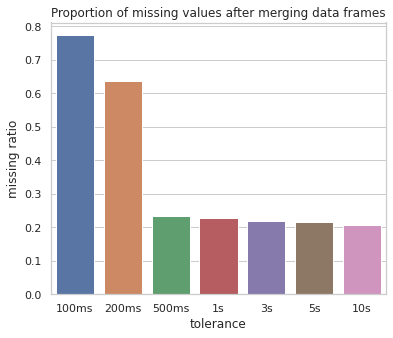

In [42]:
missing_ratio=[]
time_delay=['100ms','200ms','500ms','1s','3s','5s','10s']
for delay in time_delay:
    df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta(delay),direction='nearest')
    missing_ratio.append(df['accuracy'].isnull().sum()/len(df))
    
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,5))
sns.barplot(x=time_delay, y=missing_ratio, palette="deep")
plt.xlabel('tolerance')
plt.ylabel('missing ratio')
plt.title('Proportion of missing values after merging data frames')
plt.show()

In [43]:
#容许公差为1s，方向为'nearest'
df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')
df_full=pd.merge_asof(datetime,df,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')

In [44]:
print('accuracy的缺失值占比为:{}\n'.format(df_full['accuracy'].isnull().sum()/len(df_full)))
print('number的缺失值占比为:{}\n'.format(df_full['number'].isnull().sum()/len(df_full)))

accuracy的缺失值占比为:0.20034598641380927

number的缺失值占比为:0.00014219285838973638



In [45]:
df_full.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude
0,2017-06-14 08:04:51.760,18.0,26.166667,7.563457,38.0,9.0,6.0,50.826712,-0.119916,134.701051
1,2017-06-14 08:04:51.770,18.0,26.166667,7.563457,38.0,9.0,6.0,50.826712,-0.119916,134.701051
2,2017-06-14 08:04:51.780,18.0,26.166667,7.563457,38.0,9.0,6.0,50.826712,-0.119916,134.701051
3,2017-06-14 08:04:51.790,18.0,26.166667,7.563457,38.0,9.0,6.0,50.826712,-0.119916,134.701051
4,2017-06-14 08:04:51.800,18.0,26.166667,7.563457,38.0,9.0,6.0,50.826712,-0.119916,134.701051


In [46]:
#缺失值标记为GPS信号丢失（创建一个新的特征）
df_full['is_GPS_exist']=1
df_full.loc[df_full['accuracy'].isnull(),'is_GPS_exist']=0
df_full.set_index('time',inplace=True)
df_full.interpolate(method='time',inplace=True)
df_full.reset_index(inplace=True)
df_full.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude,is_GPS_exist
0,2017-06-14 08:04:51.760,18.0,26.166667,7.563457,38.0,9.0,6.0,50.826712,-0.119916,134.701051,1
1,2017-06-14 08:04:51.770,18.0,26.166667,7.563457,38.0,9.0,6.0,50.826712,-0.119916,134.701051,1
2,2017-06-14 08:04:51.780,18.0,26.166667,7.563457,38.0,9.0,6.0,50.826712,-0.119916,134.701051,1
3,2017-06-14 08:04:51.790,18.0,26.166667,7.563457,38.0,9.0,6.0,50.826712,-0.119916,134.701051,1
4,2017-06-14 08:04:51.800,18.0,26.166667,7.563457,38.0,9.0,6.0,50.826712,-0.119916,134.701051,1


In [47]:
df_full.isnull().sum()

time            0
number          0
snr_mean        0
snr_std         0
snr_max         0
snr_min         0
accuracy        0
latitude        0
longitude       0
altitude        0
is_GPS_exist    0
dtype: int64

In [48]:
df_full.to_pickle('/home/ossdata/dengjiebi/data_processed/validate/hand_gps_and_loc.pkl')

### hips

In [49]:
df1=pd.read_pickle('../SHL2023/data_processed/validate/hips_gps.pkl')
df2=pd.read_pickle('../SHL2023/data_processed/validate/hips_loc_full.pkl')
datetime1=pd.to_datetime(df1['time'], unit="ms")
df1['time']=datetime1
datetime2=pd.to_datetime(df2['time'], unit="ms")
df2['time']=datetime2

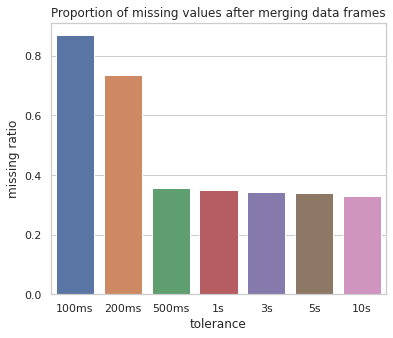

In [50]:
missing_ratio=[]
time_delay=['100ms','200ms','500ms','1s','3s','5s','10s']
for delay in time_delay:
    df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta(delay),direction='nearest')
    missing_ratio.append(df['accuracy'].isnull().sum()/len(df))
    
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,5))
sns.barplot(x=time_delay, y=missing_ratio, palette="deep")
plt.xlabel('tolerance')
plt.ylabel('missing ratio')
plt.title('Proportion of missing values after merging data frames')
plt.show()

In [51]:
#容许公差为1s，方向为'nearest'
df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')
df_full=pd.merge_asof(datetime,df,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')

In [52]:
print('accuracy的缺失值占比为:{}\n'.format(df_full['accuracy'].isnull().sum()/len(df_full)))
print('number的缺失值占比为:{}\n'.format(df_full['number'].isnull().sum()/len(df_full)))

accuracy的缺失值占比为:0.40655890434671826

number的缺失值占比为:0.12731553984557176



In [53]:
df_full.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude
0,2017-06-14 08:04:51.760,16.0,26.0625,6.147832,38.0,18.0,8.0,50.826732,-0.119872,133.989176
1,2017-06-14 08:04:51.770,16.0,26.0625,6.147832,38.0,18.0,8.0,50.826732,-0.119872,133.989176
2,2017-06-14 08:04:51.780,16.0,26.0625,6.147832,38.0,18.0,8.0,50.826732,-0.119872,133.989176
3,2017-06-14 08:04:51.790,16.0,26.0625,6.147832,38.0,18.0,8.0,50.826732,-0.119872,133.989176
4,2017-06-14 08:04:51.800,16.0,26.0625,6.147832,38.0,18.0,8.0,50.826732,-0.119872,133.989176


In [54]:
#缺失值标记为GPS信号丢失（创建一个新的特征）
df_full['is_GPS_exist']=1
df_full.loc[df_full['accuracy'].isnull(),'is_GPS_exist']=0
df_full.set_index('time',inplace=True)
df_full.interpolate(method='time',inplace=True)
df_full.reset_index(inplace=True)
df_full.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude,is_GPS_exist
0,2017-06-14 08:04:51.760,16.0,26.0625,6.147832,38.0,18.0,8.0,50.826732,-0.119872,133.989176,1
1,2017-06-14 08:04:51.770,16.0,26.0625,6.147832,38.0,18.0,8.0,50.826732,-0.119872,133.989176,1
2,2017-06-14 08:04:51.780,16.0,26.0625,6.147832,38.0,18.0,8.0,50.826732,-0.119872,133.989176,1
3,2017-06-14 08:04:51.790,16.0,26.0625,6.147832,38.0,18.0,8.0,50.826732,-0.119872,133.989176,1
4,2017-06-14 08:04:51.800,16.0,26.0625,6.147832,38.0,18.0,8.0,50.826732,-0.119872,133.989176,1


In [55]:
df_full.isnull().sum()

time            0
number          0
snr_mean        0
snr_std         0
snr_max         0
snr_min         0
accuracy        0
latitude        0
longitude       0
altitude        0
is_GPS_exist    0
dtype: int64

In [57]:
df_full.to_pickle('/home/ossdata/dengjiebi/data_processed/validate/hips_gps_and_loc.pkl')

### torso

In [58]:
df1=pd.read_pickle('../SHL2023/data_processed/validate/torso_gps.pkl')
df2=pd.read_pickle('../SHL2023/data_processed/validate/torso_loc_full.pkl')
datetime1=pd.to_datetime(df1['time'], unit="ms")
df1['time']=datetime1
datetime2=pd.to_datetime(df2['time'], unit="ms")
df2['time']=datetime2

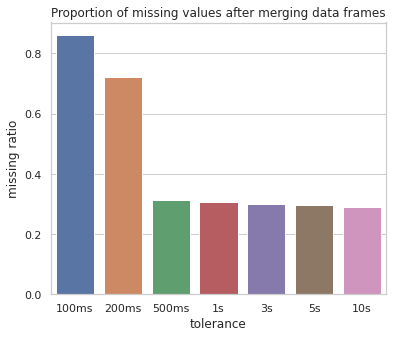

In [59]:
missing_ratio=[]
time_delay=['100ms','200ms','500ms','1s','3s','5s','10s']
for delay in time_delay:
    df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta(delay),direction='nearest')
    missing_ratio.append(df['accuracy'].isnull().sum()/len(df))
    
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,5))
sns.barplot(x=time_delay, y=missing_ratio, palette="deep")
plt.xlabel('tolerance')
plt.ylabel('missing ratio')
plt.title('Proportion of missing values after merging data frames')
plt.show()

In [60]:
#容许公差为1s，方向为'nearest'
df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')
df_full=pd.merge_asof(datetime,df,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')

In [61]:
print('accuracy的缺失值占比为:{}\n'.format(df_full['accuracy'].isnull().sum()/len(df_full)))
print('number的缺失值占比为:{}\n'.format(df_full['number'].isnull().sum()/len(df_full)))

accuracy的缺失值占比为:0.37597674233313405

number的缺失值占比为:0.11784224456046326



In [62]:
df_full.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude
0,2017-06-14 08:04:51.760,16.0,25.5625,7.580402,37.0,11.0,6.0,50.826719,-0.119801,133.551925
1,2017-06-14 08:04:51.770,16.0,25.5625,7.580402,37.0,11.0,6.0,50.826719,-0.119801,133.551925
2,2017-06-14 08:04:51.780,16.0,25.5625,7.580402,37.0,11.0,6.0,50.826719,-0.119801,133.551925
3,2017-06-14 08:04:51.790,16.0,25.5625,7.580402,37.0,11.0,6.0,50.826719,-0.119801,133.551925
4,2017-06-14 08:04:51.800,16.0,25.5625,7.580402,37.0,11.0,6.0,50.826719,-0.119801,133.551925


In [63]:
#缺失值标记为GPS信号丢失（创建一个新的特征）
df_full['is_GPS_exist']=1
df_full.loc[df_full['accuracy'].isnull(),'is_GPS_exist']=0
df_full.set_index('time',inplace=True)
df_full.interpolate(method='time',inplace=True)
df_full.reset_index(inplace=True)
df_full.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude,is_GPS_exist
0,2017-06-14 08:04:51.760,16.0,25.5625,7.580402,37.0,11.0,6.0,50.826719,-0.119801,133.551925,1
1,2017-06-14 08:04:51.770,16.0,25.5625,7.580402,37.0,11.0,6.0,50.826719,-0.119801,133.551925,1
2,2017-06-14 08:04:51.780,16.0,25.5625,7.580402,37.0,11.0,6.0,50.826719,-0.119801,133.551925,1
3,2017-06-14 08:04:51.790,16.0,25.5625,7.580402,37.0,11.0,6.0,50.826719,-0.119801,133.551925,1
4,2017-06-14 08:04:51.800,16.0,25.5625,7.580402,37.0,11.0,6.0,50.826719,-0.119801,133.551925,1


In [64]:
df_full.isnull().sum()

time            0
number          0
snr_mean        0
snr_std         0
snr_max         0
snr_min         0
accuracy        0
latitude        0
longitude       0
altitude        0
is_GPS_exist    0
dtype: int64

In [65]:
df_full.to_pickle('/home/ossdata/dengjiebi/data_processed/validate/torso_gps_and_loc.pkl')

## 测试集

In [42]:
#读取运动传感器的时间戳序列,后续训练集的合并中可以通用。
datetime=pd.read_pickle('/home/dengjiebi/SHL2023/data_test/test_label_idx.pkl')
datetime['time']=pd.to_datetime(datetime['Time'], unit="ms")
datetime=datetime.loc[np.arange(0,len(datetime),100),'time']
datetime

0          2049-02-19 12:09:28.580
100        2049-02-19 12:09:29.580
200        2049-02-19 12:09:30.580
300        2049-02-19 12:09:31.580
400        2049-02-19 12:09:32.580
                     ...          
46385400   2080-12-09 11:58:05.470
46385500   2080-12-09 11:58:06.470
46385600   2080-12-09 11:58:07.470
46385700   2080-12-09 11:58:08.470
46385800   2080-12-09 11:58:09.470
Name: time, Length: 463859, dtype: datetime64[ns]

In [32]:
df1=pd.read_pickle('../SHL2023/data_GPS/test_gps.pkl')
df2=pd.read_pickle('../SHL2023/data_test/test_loc.pkl')
datetime1=pd.to_datetime(df1['time'], unit="ms")
df1['time']=datetime1
datetime2=pd.to_datetime(df2['time'], unit="ms")
df2['time']=datetime2

In [35]:
missing_ratio=[]
time_delay=['100ms','200ms','500ms','1s','3s','5s','10s']
for delay in time_delay:
    df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta(delay),direction='nearest')
    missing_ratio.append(df['accuracy'].isnull().sum()/len(df))

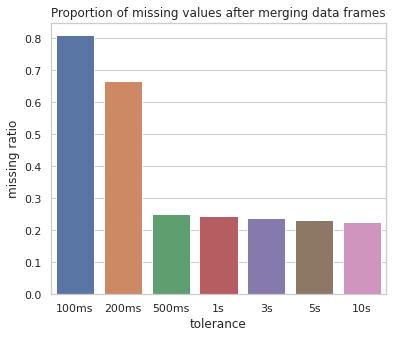

In [36]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,5))
sns.barplot(x=time_delay, y=missing_ratio, palette="deep")
plt.xlabel('tolerance')
plt.ylabel('missing ratio')
plt.title('Proportion of missing values after merging data frames')
plt.show()

In [38]:
#容许公差为1s，方向为'nearest'
df=pd.merge_asof(df1,df2,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')
df.head(20)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude
0,2049-02-19 12:06:46.420,0,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
1,2049-02-19 12:06:47.381,0,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
2,2049-02-19 12:06:48.373,0,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
3,2049-02-19 12:06:49.367,0,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
4,2049-02-19 12:06:50.383,0,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
5,2049-02-19 12:06:51.377,1,19.000000,0.000000,19.0,19.0,NaN,NaN,NaN,NaN
6,2049-02-19 12:06:52.399,1,20.000000,0.000000,20.0,20.0,NaN,NaN,NaN,NaN
7,2049-02-19 12:06:53.401,2,18.500000,2.121320,20.0,17.0,NaN,NaN,NaN,NaN
8,2049-02-19 12:06:54.398,2,18.500000,2.121320,20.0,17.0,NaN,NaN,NaN,NaN
9,2049-02-19 12:06:55.400,2,18.500000,2.121320,20.0,17.0,NaN,NaN,NaN,NaN


In [43]:
df_full=pd.merge_asof(datetime,df,on='time', tolerance=pd.Timedelta("1s"),direction='nearest')

In [44]:
df_full['accuracy'].isnull().sum()/len(df_full)

0.17809291185467999

In [46]:
df_full['number'].isnull().sum()

46

In [48]:
#缺失值标记为GPS信号丢失（创建一个新的特征）
df_full['is_GPS_exist']=1
df_full.loc[df_full['accuracy'].isnull(),'is_GPS_exist']=0

In [50]:
df_full.loc[df_full['is_GPS_exist']==0,'accuracy']=400

In [56]:
df_full.set_index('time',inplace=True)
df_full.interpolate(method='time',inplace=True)
df_full['number']=np.round(df_full['number'].values)
df_full.reset_index(inplace=True)
df_full.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude,is_GPS_exist
0,2049-02-19 12:09:28.580,15.0,17.000000,5.976143,26.0,9.0,16.0,50.866628,-0.086259,154.984261,1
1,2049-02-19 12:09:29.580,15.0,17.400000,5.448460,25.0,9.0,16.0,50.866630,-0.086257,154.919192,1
2,2049-02-19 12:09:30.580,14.0,17.928571,5.225151,25.0,11.0,16.0,50.866632,-0.086255,154.853341,1
3,2049-02-19 12:09:31.580,14.0,17.785714,5.086612,25.0,11.0,16.0,50.866633,-0.086254,154.764829,1
4,2049-02-19 12:09:32.580,14.0,17.571429,4.847113,24.0,11.0,16.0,50.866634,-0.086252,154.670125,1


In [57]:
df_full.isnull().sum()

time            0
number          0
snr_mean        0
snr_std         0
snr_max         0
snr_min         0
accuracy        0
latitude        0
longitude       0
altitude        0
is_GPS_exist    0
dtype: int64

In [64]:
#df_full=pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/test/test_gps_and_loc.pkl')
df_full['time']=df_full.time.values.astype('int') // 10**6

In [66]:
df_full.to_pickle('/home/ossdata/dengjiebi/data_tiny/test/test_gps_and_loc.pkl')

# 特征工程：速度

In [4]:
def haversine(lat1, lon1, lat2, lon2):
    lat1=np.radians(lat1)
    lon1=np.radians(lon1) 
    lat2=np.radians(lat2) 
    lon2=np.radians(lon2)
    R = 6378137
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    return 2 * np.arcsin(
        np.sqrt(
            np.sin(dlat / 2)**2 +
            np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2)) * R

In [5]:
def get_speed(data):
    #计算时间差和距离差（距离差使用haversine公式）
    data['time_diff'] = data['time'].diff(1)
    data['dist_diff'] = haversine(data['latitude'].values,
                                  data['longitude'].values,
                                  data['latitude'].shift(1).values,
                                  data['longitude'].shift(1).values)

    # 计算水平速度（水平距离 / 时间差）
    data['horizontal_speed'] = 1000 * data['dist_diff'] / data['time_diff']

    # 计算垂直速度（垂直距离 / 时间差）
    data['vertical_speed'] = 1000 * data['altitude'].diff() / data['time_diff']
    
    # 经过差分后，第一个数据的time_diff、dist_diff、horizontal_speed、vertical_speed均为空，由第二个数据填充
    data.loc[0,'time_diff':'vertical_speed']=data.loc[1,'time_diff':'vertical_speed']
    
    #使用中值滤波平滑速度
    df['time']=pd.to_datetime(df['time'], unit="ms")#将UNIX时间格式转换为精确时间
    df.set_index(keys='time',inplace=True)#设置时间为索引
    df['vertical_speed_rolling']=df['vertical_speed'].rolling('5s',center= True ,min_periods=1).median()
    df['horizontal_speed_rolling']=df['horizontal_speed'].rolling('5s',center= True ,min_periods=1).median()
    
    #去除异常值，使用线性插值
    df[df['vertical_speed_rolling']>10]= None
    df[df['horizontal_speed_rolling']>100]= None
    df.interpolate(method='time',inplace=True)
    
    #取消索引，并将精确时间格式转换为UNIX时间
    df.reset_index(inplace=True)
    df['time']=df.time.values.astype('int') // 10**6

    print('已完成！')

## 训练集

In [63]:
df=pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/train/bag_gps_and_loc.pkl')
df.head(5)

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude,is_GPS_exist
0,1490431582760,12.0,22.750000,7.955844,36.0,12.0,16.0,50.846879,-0.133339,132.073816,1
1,1490431583760,12.0,22.500000,7.740096,36.0,13.0,16.0,50.846884,-0.133338,131.974344,1
2,1490431584760,12.0,22.416667,7.982462,37.0,13.0,16.0,50.846888,-0.133338,131.875219,1
3,1490431585760,12.0,22.541667,8.004467,37.0,13.0,16.0,50.846892,-0.133338,131.778199,1
4,1490431586760,12.0,22.666667,8.026471,37.0,13.0,16.0,50.846896,-0.133337,131.681179,1


In [66]:
get_speed(df)
df.head(5)

已完成！


,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude,is_GPS_exist,time_diff,dist_diff,horizontal_speed,vertical_speed,vertical_speed_rolling,horizontal_speed_rolling
time,,,,,,,,,,,,,,,,
2017-03-25 08:46:22.760,12.0,22.750000,7.955844,36.0,12.0,16.0,50.846879,-0.133339,132.073816,1.0,1000.0,0.513801,0.513801,-0.099472,-0.099472,0.513801
2017-03-25 08:46:23.760,12.0,22.500000,7.740096,36.0,13.0,16.0,50.846884,-0.133338,131.974344,1.0,1000.0,0.513801,0.513801,-0.099472,-0.099299,0.495850
2017-03-25 08:46:24.760,12.0,22.416667,7.982462,37.0,13.0,16.0,50.846888,-0.133338,131.875219,1.0,1000.0,0.477899,0.477899,-0.099125,-0.099125,0.477899
2017-03-25 08:46:25.760,12.0,22.541667,8.004467,37.0,13.0,16.0,50.846892,-0.133338,131.778199,1.0,1000.0,0.420369,0.420369,-0.097020,-0.097020,0.420369
2017-03-25 08:46:26.760,12.0,22.666667,8.026471,37.0,13.0,16.0,50.846896,-0.133337,131.681179,1.0,1000.0,0.420369,0.420369,-0.097020,-0.097020,0.420369


<Axes: xlabel='time', ylabel='horizontal_speed'>

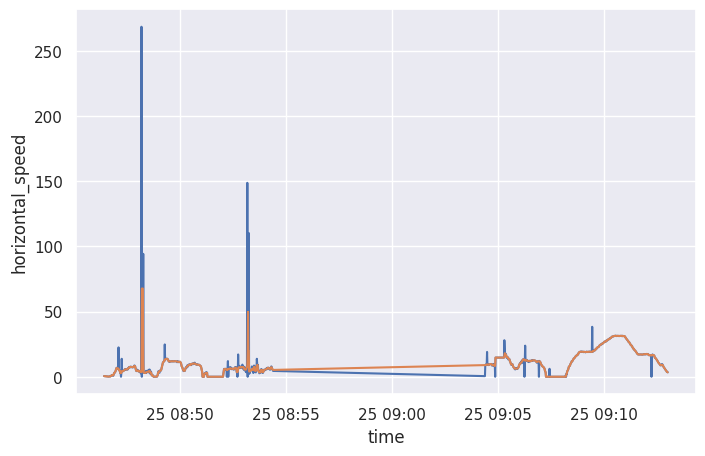

In [67]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,5))
sns.lineplot(df['horizontal_speed'][1:1000])
sns.lineplot(df['horizontal_speed_rolling'][1:1000])

In [68]:
df[['horizontal_speed','horizontal_speed_rolling']].describe()

,horizontal_speed,horizontal_speed_rolling
count,980525.000000,980525.000000
mean,6.925905,6.804179
std,24.974212,8.585823
min,0.000000,0.000000
25%,0.651163,0.681067
50%,3.224522,3.247263
75%,9.418991,9.341337
max,19116.951122,94.161130


In [69]:
df.reset_index(inplace=True)
df['time']=df.time.values.astype('int') // 10**6

In [70]:
df[['time','horizontal_speed_rolling','vertical_speed_rolling']].to_csv('/home/ossdata/dengjiebi/data_tiny/train/bag_speed.csv',index=False)

接下来是其它数据集

In [74]:
df=pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/train/hand_gps_and_loc.pkl')
get_speed(df)
df[['time','horizontal_speed_rolling','vertical_speed_rolling']].to_csv('/home/ossdata/dengjiebi/data_tiny/train/hand_speed.csv',index=False)

已完成！


In [75]:
df=pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/train/hips_gps_and_loc.pkl')
get_speed(df)
df[['time','horizontal_speed_rolling','vertical_speed_rolling']].to_csv('/home/ossdata/dengjiebi/data_tiny/train/hips_speed.csv',index=False)

已完成！


In [76]:
df=pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/train/torso_gps_and_loc.pkl')
get_speed(df)
df[['time','horizontal_speed_rolling','vertical_speed_rolling']].to_csv('/home/ossdata/dengjiebi/data_tiny/train/torso_speed.csv',index=False)

已完成！


## 验证集

In [77]:
df=pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/validate/bag_gps_and_loc.pkl')
get_speed(df)
df[['time','horizontal_speed_rolling','vertical_speed_rolling']].to_csv('/home/ossdata/dengjiebi/data_tiny/validate/bag_speed.csv',index=False)

df=pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/validate/hand_gps_and_loc.pkl')
get_speed(df)
df[['time','horizontal_speed_rolling','vertical_speed_rolling']].to_csv('/home/ossdata/dengjiebi/data_tiny/validate/hand_speed.csv',index=False)

df=pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/validate/hips_gps_and_loc.pkl')
get_speed(df)
df[['time','horizontal_speed_rolling','vertical_speed_rolling']].to_csv('/home/ossdata/dengjiebi/data_tiny/validate/hips_speed.csv',index=False)

df=pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/validate/torso_gps_and_loc.pkl')
get_speed(df)
df[['time','horizontal_speed_rolling','vertical_speed_rolling']].to_csv('/home/ossdata/dengjiebi/data_tiny/validate/torso_speed.csv',index=False)

已完成！
已完成！
已完成！
已完成！


## 测试集

In [2]:
df=pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/test/test_gps_and_loc.pkl')
df

,time,number,snr_mean,snr_std,snr_max,snr_min,accuracy,latitude,longitude,altitude,is_GPS_exist
0,2497349368580,15.0,17.000000,5.976143,26.0,9.0,16.0,50.866628,-0.086259,154.984261,1
1,2497349369580,15.0,17.400000,5.448460,25.0,9.0,16.0,50.866630,-0.086257,154.919192,1
2,2497349370580,14.0,17.928571,5.225151,25.0,11.0,16.0,50.866632,-0.086255,154.853341,1
3,2497349371580,14.0,17.785714,5.086612,25.0,11.0,16.0,50.866633,-0.086254,154.764829,1
4,2497349372580,14.0,17.571429,4.847113,24.0,11.0,16.0,50.866634,-0.086252,154.670125,1
...,...,...,...,...,...,...,...,...,...,...,...
463854,3500971085470,13.0,31.000000,10.519823,43.0,15.0,6.0,50.866383,-0.086713,113.033232,1
463855,3500971086470,13.0,30.846154,10.722610,43.0,15.0,6.0,50.866390,-0.086716,113.143433,1
463856,3500971087470,14.0,30.000000,10.355229,43.0,15.0,6.0,50.866398,-0.086722,113.234468,1
463857,3500971088470,14.0,29.857143,10.302032,43.0,15.0,8.0,50.866407,-0.086730,113.321932,1


In [6]:
get_speed(df)
df[['time','horizontal_speed_rolling','vertical_speed_rolling']].to_csv('/home/ossdata/dengjiebi/data_tiny/test/test_speed.csv',index=False)

已完成！


# 下采样
对运动传感器数据进行下采样(以下示例为测试集下采样)

In [6]:
df=pd.read_pickle('/home/dengjiebi/SHL2023/data_test/test_acc.pkl')
df.loc[np.arange(0,len(df),100)].to_pickle("/home/ossdata/dengjiebi/data_tiny/test/test_acc.pkl")

In [7]:
df=pd.read_pickle('/home/dengjiebi/SHL2023/data_test/test_gyr.pkl')
df.loc[np.arange(0,len(df),100)].to_pickle("/home/ossdata/dengjiebi/data_tiny/test/test_gyr.pkl")

In [8]:
df=pd.read_pickle('/home/dengjiebi/SHL2023/data_test/test_mag.pkl')
df.loc[np.arange(0,len(df),100)].to_pickle("/home/ossdata/dengjiebi/data_tiny/test/test_mag.pkl")

In [9]:
df.loc[np.arange(0,len(df),100)]

,time,Mag_x,Mag_y,Mag_z
0,2497349368580,-24.139197,-26.368179,-26.478982
100,2497349369580,-14.610069,-29.769593,-31.812500
200,2497349370580,-1.928659,-42.325527,-24.069789
300,2497349371580,-28.256969,-35.194469,-11.791704
400,2497349372580,-20.289282,-24.950009,-37.549991
...,...,...,...,...
46385400,3500971085470,13.684625,11.838125,-41.775625
46385500,3500971086470,3.960378,3.312500,-46.391743
46385600,3500971087470,6.129044,1.925367,-45.812500
46385700,3500971088470,8.241932,4.952955,-45.343410
